<a href="https://colab.research.google.com/github/carneiro-fernando/EBAC/blob/main/Projetos/Projeto_de_Parceria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<div style="align-items: center; justify-content: space-between;">
   <img src="https://raw.githubusercontent.com/carneiro-fernando/EBAC/e9ee8a6e1101b0b0ebd61253b91f146b0931ad63/assets/Images/Projeto_parceria/Semantix_Logo.JPG"  align="right" alt="Semantix-logo" width="15%">

   <h1>Regress√£o Linear para predi√ß√µes no Mercado Financeiro</h1>
   <b> por <a href="https://www.linkedin.com/in/fernandohcarneiro/">Fernando Carneiro</a> </b>
   
   ## Sum√°rio
   1.   [**Introdu√ß√£o**](#intro)
   1.   [**An√°lise de Dados**](#da)
   1.   [**Aprendizado de M√°quina**](#ml)
   1.   [**Resultados**](#results)
   1.   [**Conclus√£o**](#conclusion)
</div>

---

<a id='intro'></a>
## 1. Introdu√ß√£o

### 1.1 Objetivo
O objetivo deste projeto √© realizar uma an√°lise de dados explorat√≥ria e demonstrar a efic√°cia da Regress√£o Linear, uma t√©cnica b√°sica de aprendizado de m√°quina, na previs√£o do valor de a√ß√µes.

### 1.2 Descri√ß√£o dos dados
Utilizei neste projeto dados obtidos do site [Yahoo Finance](https://finance.yahoo.com) atrav√©s da API **yFinance**, dispon√≠vel [aqui](https://pypi.org/project/yfinance/), ela permite a coleta de forma f√°cil aos dados financeiros do site e por ser uma biblioteca de c√≥digo aberto, √© amplamente usada na comunidade de an√°lise financeira como ferramenta confi√°vel. A an√°lise se concentra em empresas selecionadas do setor de sa√∫de que est√£o listadas na bolsa de valores, ela inclui empresas que oferecem planos de sa√∫de e redes de hospitais. Abaixo segue uma tabela com as empresas que ser√£o analisadas durante este projeto. Na tabela o termo "*ticker*" refere-se a um c√≥digo alfanum√©rico que identifica a empresa na bolsa de valores.

| Empresa | Ticker | Ramo | Website |
| --- | --- |--- | --- |
| Kora Sa√∫de Participa√ß√µes S.A. | KRSA3 | Rede de hospitais | [Link](https://www.korasaude.com.br) |
| Hospital Mater Dei SA | MATD3 | Rede de hospitais | [Link](https://www.materdei.com.br) |
| Oncoclinicas do Brasil Servicos Medicos SA | ONCO3 | Rede de hospitais | [Link](https://www.grupooncoclinicas.com) |
| Rede D'Or S√£o Luiz S.A. | RDOR3 | Rede de hospitais | [Link](https://www.rededorsaoluiz.com.br) |
| Hapvida Participa√ß√µes e Investimentos S.A. | HAPV3 | Planos de sa√∫de | [Link](https://www.hapvida.com.br) |
| Odontoprev S.A. | ODPV3 | Planos de sa√∫de | [Link](https://www.odontoprev.com.br) |
| Qualicorp S.A. | QUAL3 | Planos de sa√∫de | [Link](https://www.qualicorp.com.br) |
| Diagn√≥sticos da Am√©rica S.A. | DASA3 | Planos de sa√∫de e rede de hospitais | [Link](https://www.dasa3.com.br) |

### 1.4 Bibliotecas
Uma breve descri√ß√£o das bibliotecas que foram usadas no projeto:

- **Pandas**: Uma biblioteca de manipula√ß√£o e an√°lise de dados que fornece estruturas de dados flex√≠veis e permite trabalhar com dados estruturados ou tabulares de maneira f√°cil e intuitiva.

- **NumPy**: Uma biblioteca para a linguagem Python, com suporte a arrays e matrizes multidimensionais, possuindo uma larga cole√ß√£o de fun√ß√µes matem√°ticas para trabalhar com estas estruturas.

- **Matplotlib**: Uma biblioteca para cria√ß√£o de gr√°ficos e visualiza√ß√µes de dados em geral, mais usada para gr√°ficos 2D de arrays.

- **Seaborn**: Baseado em Matplotlib, o Seaborn ajuda na cria√ß√£o de gr√°ficos mais atraentes e informativos. Ele √© especialmente √∫til para visualiza√ß√£o de dados estat√≠sticos.

- **Scikit-learn**: Uma das bibliotecas mais populares para aprendizado de m√°quina em Python. Ela inclui v√°rios algoritmos de classifica√ß√£o, regress√£o e agrupamento, incluindo m√°quinas de vetores de suporte, florestas aleat√≥rias, gradient boosting, k-means e DBSCAN.

- **yFinance**: Uma biblioteca Python que permite baixar dados hist√≥ricos do mercado de a√ß√µes do Yahoo Finance.

In [1]:
# Instala√ß√£o do pacote yFinance caso necess√°rio
try:
    import yfinance as yf
except ImportError:
    !pip install -q yfinance
    import yfinance as yf

# Importa√ß√µes das bibliotecas
from datetime import datetime
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Ignora warnings
warnings.filterwarnings('ignore')

# Este breve trecho de c√≥digo nos ajuda a visualizar melhor os dados no notebook por filtrar avisos desnecess√°rios.

---
<a id='da'></a>
## 2. An√°lise de Dados

### 2.1 Coleta de dados
#### A seguir √© feito o download dos dados das empresas do ramo de sa√∫de listadas na B3 mencionadas anteriormente:

In [3]:
# Listando os ativos de sa√∫de
nomes_dos_tickers = ["KRSA3.SA", "MATD3.SA", "ONCO3.SA", "RDOR3.SA", "HAPV3.SA", "ODPV3.SA", "QUAL3.SA", "DASA3.SA"]

# Criando DataFrames com os dados hist√≥ricos para todos os ativos
ticks_df = yf.download(nomes_dos_tickers, end='2023-11-24', rounding=True, auto_adjust=True)

# Verificando o DataFrame
ticks_df.tail(5)

# A documenta√ß√£o do m√©todo .download() pode ser encontrada no link a seguir: (https://github.com/ranaroussi/yfinance/wiki/tickers#download)

[*********************100%%**********************]  8 of 8 completed


Close                                                        \
           DASA3.SA HAPV3.SA KRSA3.SA MATD3.SA ODPV3.SA ONCO3.SA QUAL3.SA   
Date                                                                        
2023-11-17    10.15     4.58     0.98     7.50    11.41     9.67     3.07   
2023-11-20    10.29     4.64     0.98     7.61    11.50     9.99     3.06   
2023-11-21     9.64     4.65     0.98     7.57    11.36     9.80     2.94   
2023-11-22     9.55     4.56     1.04     7.47    10.94     9.66     2.84   
2023-11-23     9.64     4.50     1.00     7.51    10.96     9.90     2.89   

                        High           ...     Open            Volume  \
           RDOR3.SA DASA3.SA HAPV3.SA  ... QUAL3.SA RDOR3.SA DASA3.SA   
Date                                   ...                              
2023-11-17    25.21    10.54     4.75  ...     3.15    25.95   328400   
2023-11-20    25.99    10.31     4.68  ...     3.10    25.21   227600   
2023-11-21    25.62    10.29     4.66  ...     3.06    25.99   488200   
2023-11-22    25.86     9.97     4.84  ...     2.97    25.87   487400   
2023-11-23    26.11     9.89     4.62  ...     2.85    25.98   139800   

                                                                    \
               HAPV3.SA   KRSA3.SA  MATD3.SA   ODPV3.SA   ONCO3.SA   
Date                                                                 
2023-11-17  105935300.0  1038700.0  398600.0  1424900.0  4184000.0   
2023-11-20   51808800.0   372500.0  313700.0   553300.0  3250900.0   
2023-11-21   52522200.0   469700.0  207300.0   945400.0  1515700.0   
2023-11-22  114011500.0   758400.0  285500.0  1017400.0  2274900.0   
2023-11-23   27375400.0   361600.0  121900.0   690200.0  1351600.0   

                                   
              QUAL3.SA   RDOR3.SA  
Date                               
2023-11-17   6686500.0  4470400.0  
2023-11-20   5801600.0  4017100.0  
2023-11-21   6244700.0  3428900.0  
2023-11-22  10503700.0  3933200.0  
2023-11-23   5593100.0  2018300.0  

[5 rows x 40 columns]

### 2.2 Estrutura dos dados (*schema*)
Os dados que trabalharemos tem a seguinte estrutura:

| Termo | Descri√ß√£o | Tipo de dado |
| --- | --- | --- |
|'Date' | A data do registro de pre√ßo | DateTimeIndex
| 'Open' | O pre√ßo de abertura da a√ß√£o no per√≠odo | numpy.float64 |
| 'High' | O pre√ßo mais alto alcan√ßado pela a√ß√£o no per√≠odo | numpy.float64 |
| 'Low' | O pre√ßo mais baixo alcan√ßado pela a√ß√£o no per√≠odo | numpy.float64 |
| 'Close' | O pre√ßo de fechamento da a√ß√£o no per√≠odo | numpy.float64 |
| 'Volume' | O volume de negocia√ß√£o da a√ß√£o no per√≠odo | numpy.float64 |

### 2.3 Limpeza dos dados

A primeira etapa da limpeza de dados foi verificar quantos valores nulos havia em cada coluna do DataFrame `ticks_df`. Isso √© √∫til para a limpeza de dados, pois os valores nulos podem precisar ser tratados antes da an√°lise.

In [4]:
# Verifica o n√∫mero de valores nulos em cada coluna do DataFrame
print(ticks_df.isna().sum())

Close   DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
High    DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Low     DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Open    DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998
Volume  DASA3.SA       0
        HAPV3.SA    3345
        KRSA3.SA    4161
        MATD3.SA    4096
        ODPV3.SA     519
        ONCO3.SA    4186
        QUAL3.SA    1648
        RDOR3.SA    3998


A an√°lise das s√©ries de dados dos tickers analisados revelou a presen√ßa de milhares de valores nulos, com exce√ß√£o do ticker `DASA3.SA`. Essa diferen√ßa √© explicada pelas diferentes datas de in√≠cio de registro na bolsa de valores das empresas analisadas. A DASA, por exemplo, foi a primeira empresa a iniciar suas negocia√ß√µes na bolsa dentre as empresas analisadas. A pr√≥xima etapa da an√°lise consiste em verificar as datas iniciais de registro na bolsa de valores de cada empresa.

In [5]:
# Criando um DataFrame com a data da primeira opera√ß√£o registrada no objeto inicializado da API yFinance
data_inicial_df = pd.DataFrame({'Data_inicial': [yf.Ticker(t).history_metadata['firstTradeDate'] for t in nomes_dos_tickers]}, index=nomes_dos_tickers)

# Convertendo o formato de data
data_inicial_df['Data_inicial'] = (pd.to_datetime(data_inicial_df['Data_inicial'], unit='s').dt.date)

# Verificando
data_inicial_df.sort_values(by='Data_inicial')

Data_inicial
DASA3.SA   2004-11-19
ODPV3.SA   2006-12-01
QUAL3.SA   2011-06-29
HAPV3.SA   2018-04-26
RDOR3.SA   2020-12-15
MATD3.SA   2021-05-13
KRSA3.SA   2021-08-16
ONCO3.SA   2021-09-21

Com essa informa√ß√£o em m√£os, cada ticker foi examinado em busca de valores nulos ap√≥s a data de registro inicial. O resultado (abaixo) mostra que durante o per√≠odo de registro os dados s√£o integrais, sem necessidade de interven√ß√£o adicional.

In [6]:
# Verificando se h√° valores inv√°lidos durante o per√≠odo de registro de transa√ß√µes para cada ticker.
print('Valores nulos desde o in√≠cio do registro:\n')

for ticker in data_inicial_df.index:
  data_inicial = data_inicial_df.loc[ticker, 'Data_inicial']

  # Selecionando dentro do √≠ndice 'Close' as datas entre o per√≠odo inicial e o √∫ltimo registro.
  periodo_selecionado = ticks_df['Close'][ticker].loc[data_inicial : ]

  # Imprimindo a soma de valores nulos dentro do per√≠odo selecionado.
  print(f"Nome: {ticker} | data inicial: {data_inicial} | valores nulos: {periodo_selecionado.isnull().sum()}")

Valores nulos desde o in√≠cio do registro:

Nome: KRSA3.SA | data inicial: 2021-08-16 | valores nulos: 0
Nome: MATD3.SA | data inicial: 2021-05-13 | valores nulos: 0
Nome: ONCO3.SA | data inicial: 2021-09-21 | valores nulos: 0
Nome: RDOR3.SA | data inicial: 2020-12-15 | valores nulos: 0
Nome: HAPV3.SA | data inicial: 2018-04-26 | valores nulos: 0
Nome: ODPV3.SA | data inicial: 2006-12-01 | valores nulos: 0
Nome: QUAL3.SA | data inicial: 2011-06-29 | valores nulos: 0
Nome: DASA3.SA | data inicial: 2004-11-19 | valores nulos: 0


### Visualiza√ß√£o dos dados

A an√°lise dos dados num√©ricos do DataFrame, explora padr√µes, tend√™ncias e ajuda a identificar *outliers*. Para tal, o m√©todo `describe()` faz uma an√°lise suficientemente completa.

In [7]:
# An√°lise dos dados num√©ricos. Como referencia foi usado o √≠ndice 'Close'.
ticks_df['Close'].describe()

DASA3.SA     HAPV3.SA    KRSA3.SA    MATD3.SA     ODPV3.SA  \
count  4729.000000  1384.000000  568.000000  633.000000  4210.000000   
mean     20.209672     9.024021    2.758732   11.438167     8.075549   
std      20.840433     4.032149    1.985730    3.894058     3.902593   
min       4.660000     1.940000    0.740000    6.110000     1.080000   
25%       9.640000     5.418200    1.057500    8.300000     5.680000   
50%      12.860000     8.188650    2.545000    9.690000     7.970000   
75%      24.610000    12.407300    3.550000   15.230000    11.480000   
max     195.840000    18.151400    8.150000   21.220000    16.090000   

         ONCO3.SA     QUAL3.SA    RDOR3.SA  
count  543.000000  3081.000000  731.000000  
mean     8.795967    15.589805   42.882845  
std      2.340375     7.305927   16.734248  
min      4.210000     2.800000   19.840000  
25%      6.795000    10.752500   28.950000  
50%      9.030000    13.752600   34.470000  
75%     10.615000    19.249200   62.220000  
max     15.410000    39.847300   73.300000

A partir da an√°lise, podemos extrair os seguintes *insights*:

*   DASA3.SA - √â a a√ß√£o negociada a mais tempo com +4700 registros (count), confirmando os dados que temos sobre data inicial.

*   RDOR3.SA - Tem o maior valor m√©dio, mais que o dobro da segunda a√ß√£o com maior valor.

*   KRSA3.SA - Tem o menor m√©dia e desvio padr√£o em termos de valor financeiro, em contraste DASA3.SA tem a maior volatilidade com desvio padr√£o de ~R$20,00.

*   *Outliers* - A a√ß√£o DASA3.SA tem uma diferen√ßa muito grande entre o terceiro quartil e o valor m√°ximo, indicando poss√≠veis '*outliers*'.

Abaixo foi realizada a visualiza√ß√£o explorat√≥ria dos dados hist√≥ricos dos ativos atrav√©s da plotagem de gr√°ficos de s√©ries temporais. Os gr√°ficos de s√©ries temporais s√£o ferramentas poderosas para a an√°lise de dados financeiros. A fim de simplificar o entendimento e manter a concis√£o do projeto, foram usados gr√°ficos de linha ao inv√©s de gr√°ficos de *candle sticks*. Abaixo, os gr√°ficos de todo os hist√≥rico de registro de pre√ßos de cada *ticker*, note que o intervalo de tempo de cada gr√°fico √© diferente.

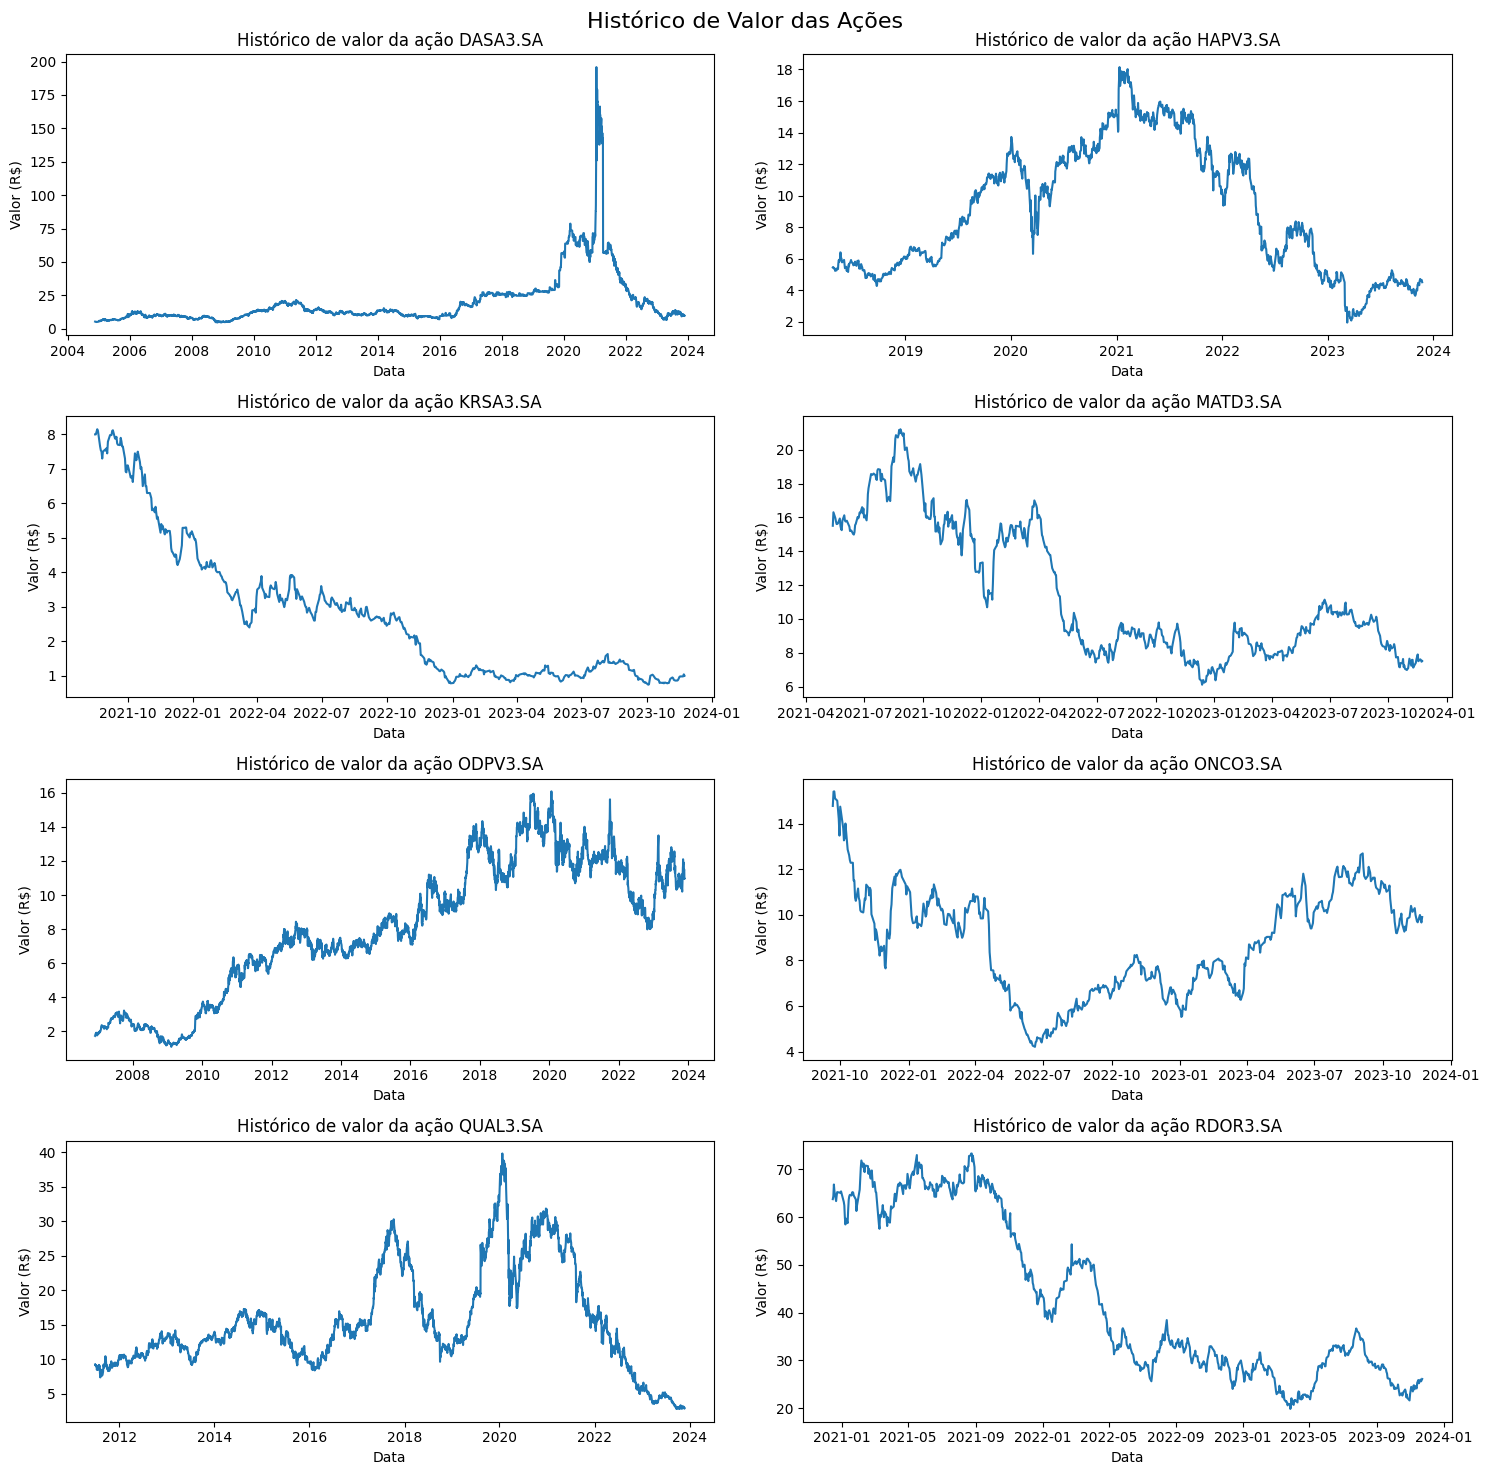

In [8]:
# Criando um grid de gr√°ficos
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle("Hist√≥rico de Valor das A√ß√µes", fontsize=16)

# La√ßo de repeti√ß√£o que cria os gr√°ficos
for (nome, dados), ax in zip(ticks_df['Close'].items(), axes.ravel()):
    sns.lineplot(x=dados.index, y=dados.values, ax=ax)
    ax.set_title(f'Hist√≥rico de valor da a√ß√£o {nome}')
    ax.set_ylabel('Valor (R$)')
    ax.set_xlabel('Data')

# Ajuste e visualiza√ß√£o
plt.tight_layout()
plt.show()

A partir da an√°lise, podemos extrair os seguintes *insights*:

* Os *tickers* com abertura anterior ao per√≠odo de pandemia (2020-2022) experimentaram uma tend√™ncia de alta por muito tempo, como fica bem claro no gr√°fico da Odontoprev (ODPV3.SA)

* Das empresas analisadas,  metade abriu seu capital na bolsa de valores durante o per√≠odo de pandemia em meados de 2021.

* Houve uma alta muito forte durante o per√≠odo de pandemia seguido de uma revers√£o, ap√≥s isso houve uma tend√™ncia de baixa (*bear market*) para alguns *tickers* e lateraliza√ß√£o para outros. Isso √© uma indica√ß√£o √≥bvia de que a alta demanda do setor de sa√∫de durante a pandemia resultou numa supervaloriza√ß√£o dos ativos que depois foi normalizada.

* O *ticker* DASA3 durante o ano de 2021 teve uma movimenta√ß√£o muito parecida com a pr√°tica '*pump and dump*' que compreende em uma pr√°tica onde h√° um aumento repentino e significativo no pre√ßo do ativo, muitas vezes impulsionado por informa√ß√µes enganosas, seguido de uma queda r√°pida nos pre√ßos, muitas vezes devolvendo o ativo ao seu valor original ou at√© abaixo.

Para fins de compara√ß√£o, foi selecionado um intervalo de tempo em comum, ou seja, em que haja dados dispon√≠veis para todas as empresas. O algoritmo abaixo visa identificar a data que seja comum √† todos os ativos analisados, que o ativo com data de primeiro registro mais recente.

In [9]:
# Criando a vari√°vel que conter√° a data mais recente
data_mais_recente = datetime.date

# Reduzindo a dimens√£o do DataFrame (transformando o √≠ndice de opera√ß√£o em coluna)
unstacked_ticks_df = ticks_df.stack(level=0).rename_axis(['Date', 'Operation'])

# Excluindo todas as linhas com dados n√£o num√©ricos (NaN) n√≥s chegamos √† primeira data comum a todos os ativos
data_mais_recente = unstacked_ticks_df.dropna().index[0][0]

# Verificando
print(f"A data mais recente dentre o primeiro registro dos DataFrames √©: {data_mais_recente.date()}")

A data mais recente dentre o primeiro registro dos DataFrames √©: 2021-09-21


A seguir, foi selecionado o per√≠odo entre 21 de Setembro de 2021 e a data de hoje (ou a √∫ltima dispon√≠vel) e verificado o tamanhos das s√©ries.

In [10]:
# Selecionando o per√≠odo encontrado previamente
ticks_2021_df = ticks_df.loc[data_mais_recente:]

# Conferindo se todos os DataFrames tem o mesmo n√∫mero de linhas
print({key: df.shape[0] for key, df in ticks_2021_df['Close'].items()})

{'DASA3.SA': 543, 'HAPV3.SA': 543, 'KRSA3.SA': 543, 'MATD3.SA': 543, 'ODPV3.SA': 543, 'ONCO3.SA': 543, 'QUAL3.SA': 543, 'RDOR3.SA': 543}


Restringindo os dados a somente os registros de fechamento ('Close'), que iremos efetivamente usar. O fechamento √© o valor do ativo refere-se ao pre√ßo pelo qual uma a√ß√£o √© negociada no final de um dia de negocia√ß√£o no mercado financeiro, este √© determinado pelo √∫ltimo neg√≥cio executado antes do encerramento do preg√£o.

In [11]:
# Cria√ß√£o de um DataFrame com os valores de fechamento de cada ativo
close_2021_df = pd.DataFrame(ticks_2021_df['Close'], columns= ticks_2021_df['Close'].columns)

# Visualiza√ß√£o do DataFrame com os dados de fechamento a partir de 2021 (close_2021_df)
close_2021_df

DASA3.SA  HAPV3.SA  KRSA3.SA  MATD3.SA  ODPV3.SA  ONCO3.SA  \
Date                                                                     
2021-09-21     44.96   15.1600      7.90     18.32     13.00     14.77   
2021-09-22     45.15   14.5707      7.80     18.51     13.34     15.40   
2021-09-23     44.74   14.8703      7.65     18.52     13.33     15.41   
2021-09-24     45.61   14.7205      7.65     18.71     14.32     15.10   
2021-09-27     44.73   14.4509      7.30     19.16     14.44     15.00   
...              ...       ...       ...       ...       ...       ...   
2023-11-17     10.15    4.5800      0.98      7.50     11.41      9.67   
2023-11-20     10.29    4.6400      0.98      7.61     11.50      9.99   
2023-11-21      9.64    4.6500      0.98      7.57     11.36      9.80   
2023-11-22      9.55    4.5600      1.04      7.47     10.94      9.66   
2023-11-23      9.64    4.5000      1.00      7.51     10.96      9.90   

            QUAL3.SA  RDOR3.SA  
Date                            
2021-09-21   20.7316     67.67  
2021-09-22   20.3943     67.20  
2021-09-23   20.4232     67.89  
2021-09-24   20.2401     67.40  
2021-09-27   20.1533     66.15  
...              ...       ...  
2023-11-17    3.0700     25.21  
2023-11-20    3.0600     25.99  
2023-11-21    2.9400     25.62  
2023-11-22    2.8400     25.86  
2023-11-23    2.8900     26.11  

[543 rows x 8 columns]

Na visualiza√ß√£o dos gr√°ficos de s√©ries temporais abaixo, √© poss√≠vel compreender o comportamento de cada ativo no mesmo intervalo de tempo, tornando-se assim mais apropriada a compara√ß√£o entre os ativos.

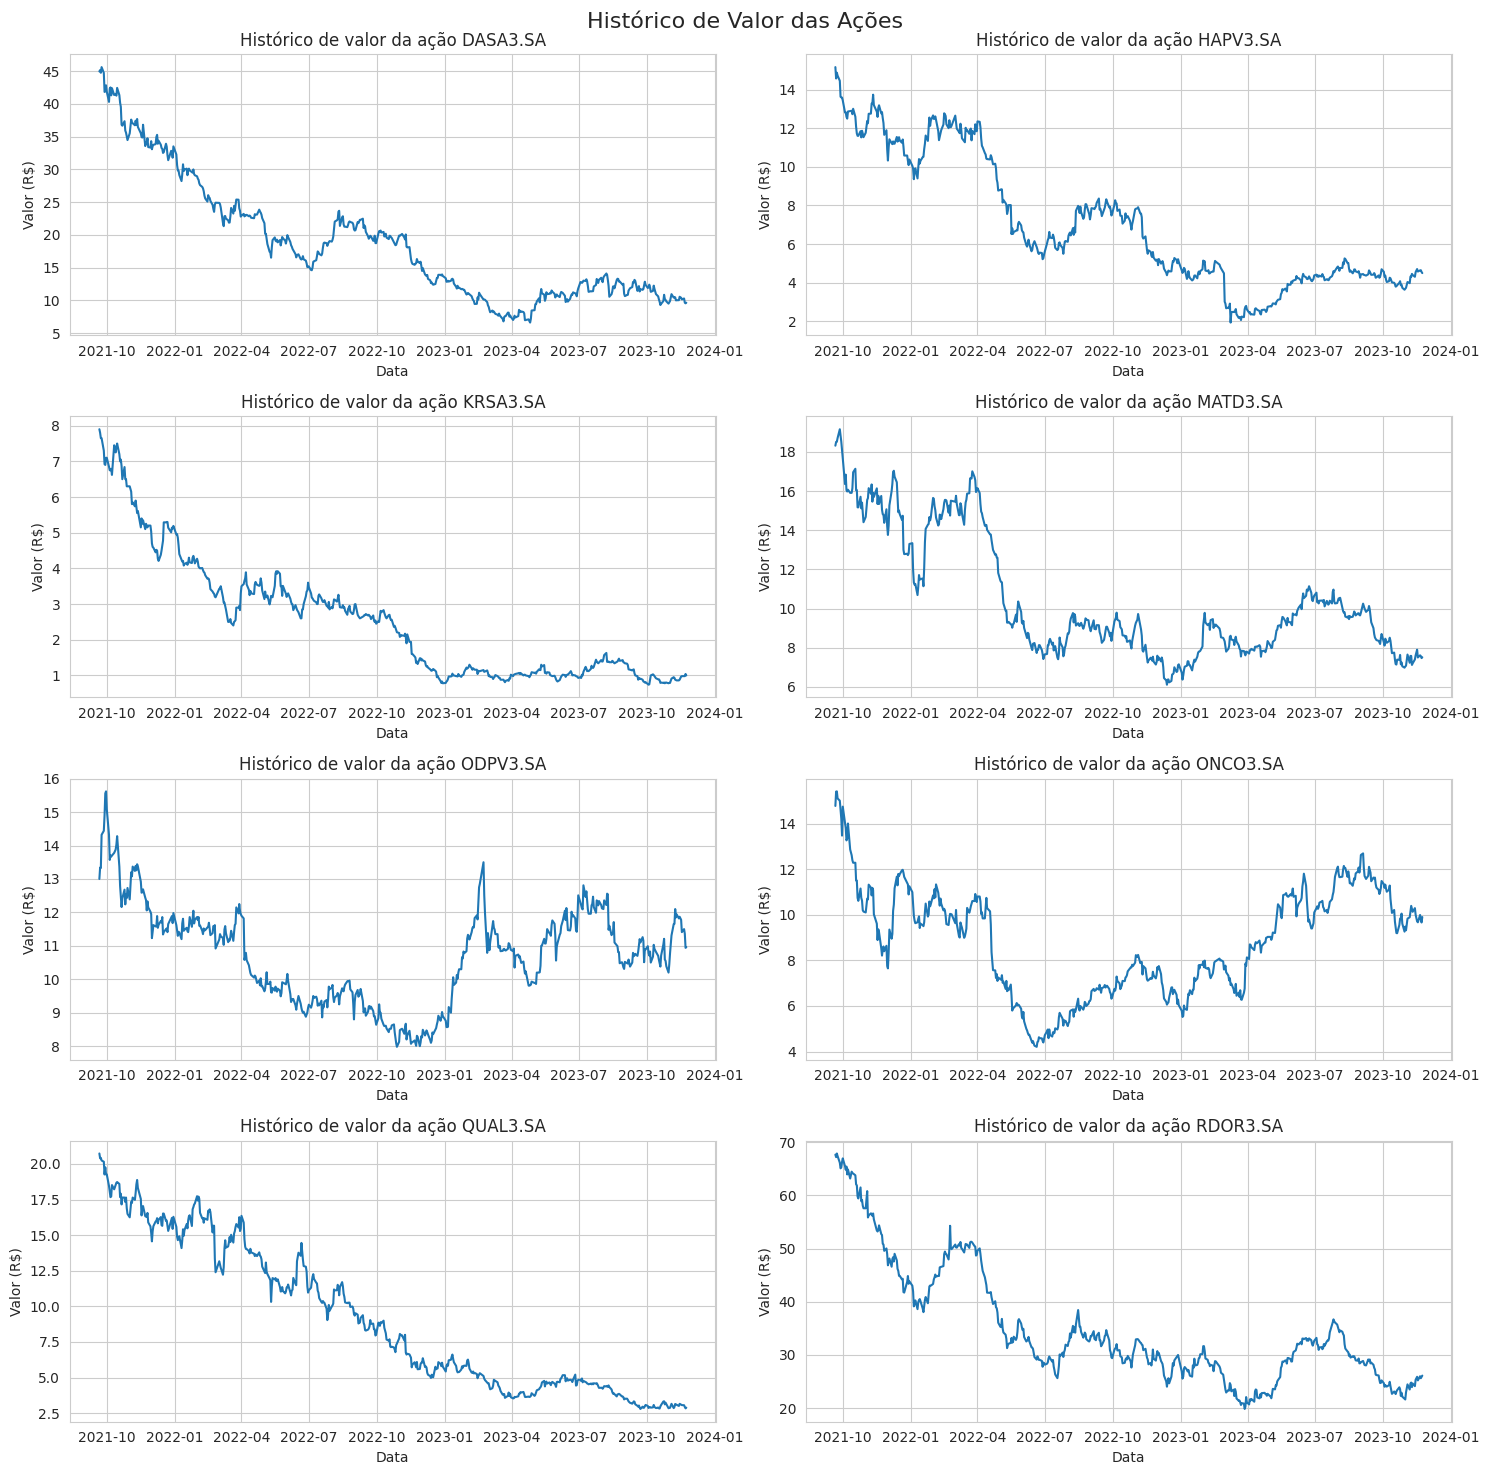

In [12]:
with sns.axes_style(style='whitegrid'):
  fig, axes = plt.subplots(4, 2, figsize=(15, 15))
  fig.suptitle("Hist√≥rico de Valor das A√ß√µes", fontsize=16)

  # La√ßo de repeti√ß√£o que cria os gr√°ficos
  for (nome, dados), ax in zip(close_2021_df.items(), axes.ravel()):
      sns.lineplot(x=dados.index, y=dados.values, ax=ax)
      ax.set_title(f'Hist√≥rico de valor da a√ß√£o {nome}')
      ax.set_ylabel('Valor (R$)')
      ax.set_xlabel('Data')

  plt.tight_layout()
  plt.show()

A partir da an√°lise, podemos extrair os seguintes *insights*:

* Apesar do eixo X (data) dos gr√°ficos compreenderem a mesma dimens√£o, o eixo Y (valor) n√£o est√° proporcionalmente igual. Note que entre a maior (RDOR3.SA) m√°xima e a menor (KRSA3.SA) m√°xima existe uma grande diferen√ßa (~875%).

* Os *tickers*, apesar de no momento ainda n√£o terem rompido a m√≠nima observada entre o fim de 2022 e o primeiro trimestre de 2023, est√£o √† longo prazo em uma tend√™ncia de queda (*bear market*).

* Foi poss√≠vel observar que os *tickers* MATD3.SA, ODPV3.SA e ONCO3.SA tem uma volatilidade alta, isso acontece quando h√° oscila√ß√µes significativas com const√¢ncia em um gr√°fico.

* Foi notado que no mesmo per√≠odo as empresas tem um comportamento muito similar, indicando uma poss√≠vel correla√ß√£o entre elas.

Realizamos uma an√°lise de correla√ß√£o entre as a√ß√µes para investigar se existia alguma rela√ß√£o entre elas. Para isso usaremos o coeficiente de correla√ß√£o de Pearson.

#### Correla√ß√£o de Pearson
√â uma medida estat√≠stica que avalia a for√ßa e a dire√ß√£o de uma rela√ß√£o linear entre duas vari√°veis cont√≠nuas. Ela √© amplamente utilizada em estat√≠stica e an√°lise de dados para quantificar o grau de associa√ß√£o entre dois conjuntos de dados. O coeficiente de correla√ß√£o de Pearson √© representado pelo s√≠mbolo "r" e varia de -1 a +1.

A f√≥rmula da correla√ß√£o de Pearson √©:

$$ r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \sum{(Y_i - \bar{Y})^2}}} $$

Onde:
- $X_i$ e $Y_i$ s√£o os valores individuais das duas vari√°veis.
- $\bar{X}$ e $\bar{Y}$ s√£o as m√©dias das duas vari√°veis, respectivamente.

A interpreta√ß√£o do coeficiente de correla√ß√£o de Pearson √© a seguinte:

- $r = 1$: Correla√ß√£o perfeita positiva (quando uma vari√°vel aumenta, a outra tamb√©m aumenta proporcionalmente).
- $r = -1$: Correla√ß√£o perfeita negativa (quando uma vari√°vel aumenta, a outra diminui proporcionalmente).
- $r = 0$: Aus√™ncia de correla√ß√£o linear.

Apesar de sua ampla aceita√ß√£o, √© importante mencionar que o coeficiente de correla√ß√£o de Pearson mede apenas rela√ß√µes lineares entre vari√°veis e √© sens√≠vel √† *outliers*. Ele tamb√©m n√£o implica causalidade, podendo haver outros fatores que falsamente apontem correla√ß√£o, requerendo assim interpreta√ß√£o cuidadosa considerando suas limita√ß√µes.


In [13]:
# C√°lculo da correla√ß√£o de Pearson entre os ativos
close_2021_df = close_2021_df.reset_index()
corr_df = close_2021_df.corr(method='pearson', numeric_only=True)

corr_df

DASA3.SA  HAPV3.SA  KRSA3.SA  MATD3.SA  ODPV3.SA  ONCO3.SA  \
DASA3.SA  1.000000  0.933989  0.961279  0.822507  0.390810  0.301279   
HAPV3.SA  0.933989  1.000000  0.880763  0.880492  0.361819  0.296954   
KRSA3.SA  0.961279  0.880763  1.000000  0.772448  0.377461  0.223558   
MATD3.SA  0.822507  0.880492  0.772448  1.000000  0.664516  0.580703   
ODPV3.SA  0.390810  0.361819  0.377461  0.664516  1.000000  0.746350   
ONCO3.SA  0.301279  0.296954  0.223558  0.580703  0.746350  1.000000   
QUAL3.SA  0.924147  0.936355  0.931501  0.812480  0.311872  0.123022   
RDOR3.SA  0.912814  0.919491  0.873941  0.935598  0.575625  0.463526   

          QUAL3.SA  RDOR3.SA  
DASA3.SA  0.924147  0.912814  
HAPV3.SA  0.936355  0.919491  
KRSA3.SA  0.931501  0.873941  
MATD3.SA  0.812480  0.935598  
ODPV3.SA  0.311872  0.575625  
ONCO3.SA  0.123022  0.463526  
QUAL3.SA  1.000000  0.871400  
RDOR3.SA  0.871400  1.000000

A visualiza√ß√£o da matriz de correla√ß√£o temos uma diagonal principal contendo valores 1, pois uma vari√°vel est√° perfeitamente correlacionada consigo mesma. No entanto, para facilitar a compreens√£o, abaixo foi eliminado a tri√¢ngulo superior (com dados repetidos) e plotado um mapa de calor, que √© uma representa√ß√£o gr√°fica onde as varia√ß√µes nos valores das vari√°veis s√£o mostradas por meio de cores.

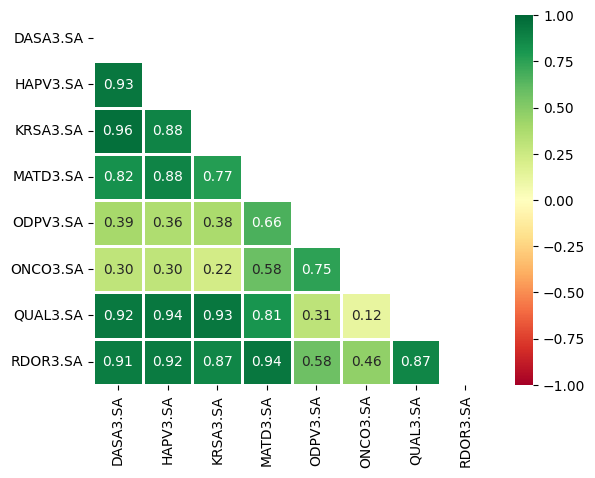

In [14]:
# Criando um numpy array identico (like) a corr_df e preenchido com zeros, ele ser√° usado para eliminar a parte triangular superio da matriz de correla√ß√£o.
mask = np.zeros_like(corr_df)

# Fun√ß√£o do pacote NumPy que dado um array ou matriz (quadrada), seleciona a parte tri√¢ngular superior.
mask[np.triu_indices_from(mask)] = True

# Gerando gr√°fico
sns.heatmap(corr_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2, annot=True, fmt=".2f")
plt.xticks(rotation=90)
plt.show()

Foi poss√≠vel notar no mapa de calor que os ativos n√£o s√£o inversamente proporcionais, tendo alguns um coeficiente de correla√ß√£o muito pr√≥ximo de 1 com excess√£o dos *tickers* ODPV3 e ONCO3.

Para aprofundar nossa an√°lise, decidi investigar se existia uma correla√ß√£o dentro do mesmo segmento de atua√ß√£o. Foram ent√£o divididos em dois setores espec√≠ficos: Planos de Sa√∫de e Hospitais.

In [15]:
# Criando um DataFrame com os ativos de planos de sa√∫de e hospitais
ticks_plano_saude_df = close_2021_df[['Date', 'HAPV3.SA', 'ODPV3.SA', 'QUAL3.SA', 'DASA3.SA']]
ticks_hospitais_df = close_2021_df[['Date', 'KRSA3.SA', 'MATD3.SA', 'ONCO3.SA', 'RDOR3.SA']]

print('\n DataFrame com Planos de Sa√∫de:')
ticks_plano_saude_df.head(4)



 DataFrame com Planos de Sa√∫de:


Date  HAPV3.SA  ODPV3.SA  QUAL3.SA  DASA3.SA
0 2021-09-21   15.1600     13.00   20.7316     44.96
1 2021-09-22   14.5707     13.34   20.3943     45.15
2 2021-09-23   14.8703     13.33   20.4232     44.74
3 2021-09-24   14.7205     14.32   20.2401     45.61

In [16]:
print('\n DataFrame com Redes de Hospitais:')
ticks_hospitais_df.head(4)


 DataFrame com Redes de Hospitais:


Date  KRSA3.SA  MATD3.SA  ONCO3.SA  RDOR3.SA
0 2021-09-21      7.90     18.32     14.77     67.67
1 2021-09-22      7.80     18.51     15.40     67.20
2 2021-09-23      7.65     18.52     15.41     67.89
3 2021-09-24      7.65     18.71     15.10     67.40

√â presum√≠vel que empresas que operem no mesmo setor tenham performances similares devido a fatores de mercado compartilhados. Para visualizar essas poss√≠veis correla√ß√µes de maneira mais intuitiva, optamos por criar outro vez um mapa de calor, sendo agora um para cada segmento.

In [17]:
# Criando DataFrames com dados de correla√ß√£o
corr_planos_df = ticks_plano_saude_df.corr(method='pearson', numeric_only=True)
corr_hospitais_df = ticks_hospitais_df.corr(method='pearson', numeric_only=True)
corr_planos_df.head().reset_index().columns.name = None
corr_hospitais_df.head().reset_index().columns.name = None

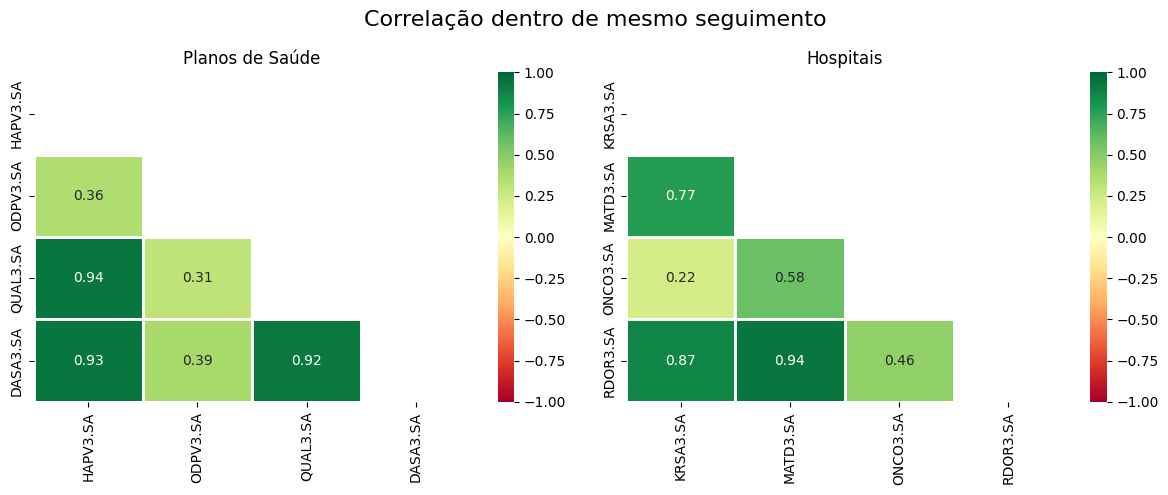

In [18]:
# Criando gr√°fico de correla√ß√£o para os planos de sa√∫de e hospitais
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Correla√ß√£o dentro de mesmo seguimento", fontsize=16)

# Criando um numpy array identico (like) a corr_df e preenchido com zeros
mask_segmentos = np.zeros_like(corr_planos_df)
mask_segmentos[np.triu_indices_from(mask_segmentos)] = True

# Mapa de calor para corr_planos_df
sns.heatmap(corr_planos_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0, mask=mask_segmentos, linewidths=2, annot=True, fmt=".2f", ax=axes[0])
axes[0].set_title("Planos de Sa√∫de")

# Mapa de calor para corr_hospitais_df
sns.heatmap(corr_hospitais_df, cmap='RdYlGn', vmax=1.0, vmin=-1.0, mask=mask_segmentos, linewidths=2, annot=True, fmt=".2f", ax=axes[1])
axes[1].set_title("Hospitais")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()

plt.show()

Era esperado que cada mapa de calor estivesse completamente verde escuro, com valores pr√≥ximo a 1. No entanto, foi notado que as empresas tem pouco em comum em termos de comportamento, n√£o apresentando nenhuma informa√ß√£o relevante no que diz respeito √† sua correla√ß√£o definida pelo setor de atua√ß√£o.

Vamos proceder com a an√°lise da correla√ß√£o com um benchmark conhecido da B3, o Ibovespa. O Ibovespa √© o principal indicador de desempenho das a√ß√µes negociadas na B3 e reflete o comportamento das principais a√ß√µes listadas na bolsa. Ele √© usado como refer√™ncia para o desempenho do mercado acion√°rio brasileiro. Portanto, verificar a correla√ß√£o das a√ß√µes com o Ibovespa nos permitir√° entender como elas est√£o performando em rela√ß√£o ao mercado como um todo.

In [19]:
# Extrai o hist√≥rico de pre√ßos de fechamento (Close) do IBOVESPA durante o mesmo intervalo de tempo
ibovespa_ticker = yf.Ticker('^BVSP')
ibov_df = ibovespa_ticker.history(start=data_mais_recente, end='2023-11-24')
ibov_df = ibov_df[['Close']]
ibov_df = ibov_df.set_index(pd.to_datetime(ibov_df.index.date)).rename(columns={'Close':'Valores'})

In [20]:
# Criando um DataFrame para armazenar as correla√ß√µes
ibov_corr = pd.DataFrame(columns=['Ticker', 'Correlacao'])

# La√ßo de repeti√ß√£o que calcula a correla√ß√£o entre o IBOV e cada ativo
for t in close_2021_df.iloc[:,1:]:
  correlation = np.corrcoef(close_2021_df[t], ibov_df['Valores'])
  ibov_corr = pd.concat([ibov_corr, pd.DataFrame({'Ticker': [t], 'Correlacao': [np.round(correlation[0][1], 2)]})], ignore_index=True)

ibov_corr

Ticker  Correlacao
0  DASA3.SA       -0.12
1  HAPV3.SA       -0.00
2  KRSA3.SA       -0.23
3  MATD3.SA        0.12
4  ODPV3.SA        0.21
5  ONCO3.SA        0.51
6  QUAL3.SA       -0.24
7  RDOR3.SA        0.07

A partir da an√°lise, podemos extrair os seguintes *insights*:

* Nenhum dos ativos apresentou um coeficiente de correla√ß√£o suficientemente forte para ser considerado correlacionado com o √≠ndice Bovespa. Isso sugere que a performance do setor de sa√∫de durante o per√≠odo analisado estava desvinculada do comportamento geral do mercado.

* Observou-se uma correla√ß√£o negativa fraca, principalmente entre as empresas relacionadas aos planos de sa√∫de. Isso sugere que, durante uma forte baixa de mercado devido √†s repercuss√µes da pandemia, o setor de planos de sa√∫de valorizou-se devido √† alta demanda. No entanto, durante a recupera√ß√£o do mercado, observa-se uma redu√ß√£o na valoriza√ß√£o desses ativos.

<a id='ml'></a>
## Machine Learning

Utilizaremos, a partir daqui, um m√©todo de *Machine Learning* chamado **Regress√£o Linear** para tentar prever os pre√ßos de uma a√ß√£o com base em outros indicadores, como os dados de fechamento de dias anteriores e os dados relacionados a outras a√ß√µes que apresentavam certa correla√ß√£o. Antes, uma breve introdu√ß√£o aos termos:

#### Aprendizado de M√°quina (*Machine Learning*)

O *Machine Learning* (Aprendizado de M√°quina) √© um campo da computa√ß√£o que se concentra no desenvolvimento de algoritmos e modelos que capacitam sistemas a aprender padr√µes a partir de dados. Pode-se dizer, em termo muito simples, que ao inv√©s vez de programar explicitamente regras para realizar uma tarefa espec√≠fica, os algoritmos de *Machine Learning* utilizam dados para treinar modelos e melhorar seu desempenho ao longo do tempo. Esses modelos podem ser aplicados em diversas √°reas, como reconhecimento de padr√µes, classifica√ß√£o, clusteriza√ß√£o, previs√£o e otimiza√ß√£o.

*fonte: https://www.ibm.com/topics/machine-learning*


#### Regress√£o Linear

A *Regress√£o Linear Simples* √© um m√©todo estat√≠stico que busca estabelecer a rela√ß√£o linear entre uma vari√°vel dependente (a vari√°vel que se pretende prever) e uma ou mais vari√°veis independentes (vari√°veis explicativas). No contexto de *Machine Learning*, a Regress√£o Linear √© frequentemente utilizada para prever valores cont√≠nuos, como neste caso o pre√ßo de uma a√ß√£o.

A equa√ß√£o da Regress√£o Linear simples √© representada por:

$$ Y = \beta_0 + \beta_1 \cdot X + \varepsilon $$

onde:
- $ Y $ √© a vari√°vel dependente,
- $ X $ √© a vari√°vel independente,
- $ \beta_0 $ √© o intercepto (ponto onde a reta corta o eixo vertical),
- $ \beta_1 $ √© o coeficiente de inclina√ß√£o da reta,
- $ \varepsilon $ √© o termo de erro, representando a varia√ß√£o n√£o explicada.

O objetivo da Regress√£o Linear √© encontrar os valores de $ \beta_0 $ e $ \beta_1 $ que minimizam a soma dos quadrados dos res√≠duos, ou seja, a diferen√ßa entre os valores preditos pela reta e os valores reais observados. Isso permite criar um modelo linear que descreve a rela√ß√£o entre as vari√°veis, facilitando previs√µes e an√°lises.

*fonte: https://www.mathworks.com/discovery/linear-regression.html*

Com o objetivo de preservar a coes√£o e a concis√£o do c√≥digo, empreguei minha expertise em Orienta√ß√£o a Objetos para desenvolver duas Classes encarregadas de realizar as etapas de prepara√ß√£o e treinamento dos dados. Essa abordagem contribui n√£o apenas para uma estrutura mais organizada e compreens√≠vel, mas tamb√©m permite uma manipula√ß√£o eficaz dos dados, otimizando o processo como um todo.

In [21]:
class DataPreparation:
    # Inicializa a classe com os par√¢metros necess√°rios
    def __init__(self, df, ticker_list, begin_date, end_date, features, target, operation, days_before):
        self.df = df.copy()
        self.transformed_df = df
        self.ticker_list = ticker_list
        self.begin_date = begin_date
        self.end_date = end_date
        self.features = features
        self.target = target
        self.operation = operation
        self.days_before = days_before

    # Transforma o dataframe para o formato longo
    def transform_to_long_format(self):
        self.transformed_df = self.transformed_df.stack(level=0).rename_axis(['Data', 'Operacao']).reset_index()

    # Seleciona as colunas necess√°rias e remove os valores NA
    def select_columns_and_drop_na(self):
        if self.ticker_list:
            self.transformed_df = self.transformed_df.loc[:, ['Data', 'Operacao', self.target] + self.ticker_list].dropna()
        else:
            self.transformed_df = self.transformed_df.dropna()

    # Transforma o dataframe para o formato largo
    def transform_to_wide_format(self):
        self.transformed_df = self.transformed_df.pivot(index='Data', columns='Operacao')
        self.transformed_df.columns = [f'{col[0]}_{col[1]}' if col[1] else col[0] for col in self.transformed_df.columns]

    # Filtra o dataframe por data
    def filter_by_date(self):
        if self.begin_date:
            self.transformed_df = self.transformed_df[(self.transformed_df.index >= str(self.begin_date))]
        if self.end_date:
            self.transformed_df = self.transformed_df[(self.transformed_df.index<= str(self.end_date))]

    # Adiciona partes da data como colunas separadas
    def add_date_parts(self):
        self.transformed_df['Ano'] = self.transformed_df.index.year
        self.transformed_df['Mes'] = self.transformed_df.index.month
        self.transformed_df['Dia'] = self.transformed_df.index.day
        self.transformed_df['DiaDaSemana'] = self.transformed_df.index.dayofweek

    # Cria a vari√°vel alvo
    def create_target_variable(self):
        # Identifica a coluna alvo, cria 'y', remove a coluna alvo e desloca os dados
        target_column = [col for col in self.transformed_df.columns if col.startswith(self.target) and col.endswith(self.operation)]
        self.y = self.transformed_df[target_column][self.days_before:] if self.days_before != 0 else self.transformed_df[target_column]
        self.transformed_df = self.transformed_df.drop(columns=target_column)
        self.transformed_df = self.transformed_df.shift(-self.days_before).dropna()

    # Seleciona as colunas de recursos
    def select_feature_columns(self):
        # Se existem recursos, seleciona as colunas correspondentes
        if self.features:
            selected_columns = [col for col in self.transformed_df.columns if col.endswith(tuple(self.features))]
            self.transformed_df = self.transformed_df[['Ano', 'Mes', 'Dia', 'DiaDaSemana'] + selected_columns]

    # Cria a vari√°vel preditora
    def create_predictor_variable(self):
        # Define 'x' como uma c√≥pia do dataframe
        self.x = self.transformed_df.copy()

    # Cria as vari√°veis x e y
    def create_xy(self):
        # Executa uma s√©rie de transforma√ß√µes e cria as vari√°veis 'x' e 'y'
        self.transform_to_long_format()
        self.select_columns_and_drop_na()
        self.transform_to_wide_format()
        self.filter_by_date()
        self.add_date_parts()
        self.create_target_variable()
        self.select_feature_columns()
        self.create_predictor_variable()

        # Retorna as vari√°veis 'x' e 'y'
        return self.x, self.y

class ModelTraining:
    # Inicializa a classe com o modelo, dados e tamanho do teste
    def __init__(self, model, x, y, test_size=0.2):
        self.model = model
        self.x = x
        self.y = y
        self.test_size = test_size
        self.y_scaler = StandardScaler()

    # Normaliza os dados
    def normalize_data(self):
        x_scaler = StandardScaler()
        self.x_normalized = pd.DataFrame(x_scaler.fit_transform(self.x), columns=self.x.columns, index=self.x.index)
        self.y_normalized = pd.DataFrame(self.y_scaler.fit_transform(self.y), columns=self.y.columns, index=self.y.index)

    # Divide os dados em treino e teste
    def split_data(self):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(
            self.x_normalized, self.y_normalized, test_size=self.test_size, shuffle=False)

    # Treina o modelo
    def fit_model(self):
        self.model.fit(self.x_train, self.y_train)

    # Faz a previs√£o
    def predict(self):
        self.predicted_normalized = self.model.predict(self.x_test)

    # Desnormaliza os dados
    def denormalize_data(self):
        self.predicted = pd.DataFrame(self.y_scaler.inverse_transform(self.predicted_normalized), columns=self.y.columns, index=self.x_test.index)
        self.y_test = pd.DataFrame(self.y_scaler.inverse_transform(self.y_test), columns=self.y.columns, index=self.y_test.index)

    # Executa todo o processo de treinamento e previs√£o
    def train_and_predict(self):
        self.normalize_data()
        self.split_data()
        self.fit_model()
        self.predict()
        self.denormalize_data()
        return self.y_test, self.predicted
    
# -----------------------------------------------------------------

# Classe DataPreparation 
    
#     √â usada para preparar um conjunto de dados para an√°lise. Ela realiza v√°rias transforma√ß√µes nos dados para garantir que estejam no formato correto para an√°lise posterior. Aqui est√° uma descri√ß√£o detalhada de cada m√©todo:

#     Par√¢metros:
#         df (pd.DataFrame): DataFrame original.
#         ticker_list (list): Lista de tickers.
#         begin_date (str): Data de in√≠cio para filtragem.
#         end_date (str): Data de t√©rmino para filtragem.
#         features (list): Lista de features.
#         target (str): Nome da vari√°vel alvo.
#         operation (str): Opera√ß√£o relacionada √† vari√°vel alvo.
#         days_before (int): N√∫mero de dias para deslocamento da vari√°vel alvo.

#     M√©todos:
#         transform_to_long_format(): Transforma o DataFrame para o formato longo.
#         select_columns_and_drop_na(): Seleciona colunas necess√°rias e remove valores NA.
#         transform_to_wide_format(): Transforma o DataFrame para o formato largo.
#         filter_by_date(): Filtra o DataFrame por data.
#         add_date_parts(): Adiciona partes da data como colunas separadas.
#         create_target_variable(): Cria a vari√°vel alvo.
#         select_feature_columns(): Seleciona as colunas de features.
#         create_predictor_variable(): Cria a vari√°vel preditora.
#         create_xy(): Executa uma s√©rie de transforma√ß√µes para criar as vari√°veis 'x' e 'y'.

# -----------------------------------------------------------------        

# Classe ModelTraining

#     √â usada para treinar um modelo de machine learning e fazer previs√µes. Aqui est√° uma descri√ß√£o detalhada de cada m√©todo:

#     Par√¢metros:
#         model: Modelo de machine learning.
#         x (pd.DataFrame): Vari√°veis preditoras.
#         y (pd.DataFrame): Vari√°veis alvo.
#         test_size (float): Tamanho do conjunto de teste (padr√£o √© 0.2).

#     M√©todos:
#         normalize_data(): Normaliza os dados.
#         split_data(): Divide os dados em conjuntos de treino e teste.
#         fit_model(): Treina o modelo.
#         predict(): Faz a previs√£o.
#         denormalize_data(): Desnormaliza os dados.
#         train_and_predict(): Executa todo o processo de treinamento e previs√£o.

A prepara√ß√£o dos dados para an√°lise (abaixo) se inicia configurando par√¢metros como DataFrame original, a√ß√µes de interesse, caracter√≠sticas, intervalo de datas, alvo da previs√£o, opera√ß√£o ('Close') e dias anteriores. A classe DataPreparation √© ent√£o instanciada, e o m√©todo `create_xy` √© utilizado para preparar `x` e `y`, essenciais para an√°lise ou modelagem subsequente. Ap√≥s √© feito o treinamento com um modelo de regress√£o linear, retornando os dados de teste reais e as previs√µes feitas pelo modelo. Estes s√£o armazenados nas vari√°veis `y_test` e `predicted`, respectivamente.

In [22]:
# Define os par√¢metros
df = ticks_df
ticker_list = ['DASA3.SA', 'HAPV3.SA', 'QUAL3.SA',  'KRSA3.SA', 'MATD3.SA']
features = ['Open', 'Volume','Close']
begin_date = ''
end_date = ''
target = 'RDOR3.SA'
operation = 'Close'
days_before = 7

# Cria uma inst√¢ncia da classe DataPreparation
data_prep = DataPreparation(df, ticker_list, begin_date, end_date, features, target, operation, days_before)

# Usa o m√©todo create_xy para preparar os dados
x, y = data_prep.create_xy()

### Predi√ß√£o
No processo de predi√ß√£o em machine learning, o modelo √© treinado com dados hist√≥ricos para identificar padr√µes e rela√ß√µes. Posteriormente, esses padr√µes s√£o utilizados para fazer previs√µes sobre novos dados, permitindo antecipar resultados ou tend√™ncias futuras.

In [23]:
# Define o modelo - treina - faz a previs√£o
model = LinearRegression()

model_training = ModelTraining(model, x, y)

y_test, predicted = model_training.train_and_predict()

√â ent√£o criado um DataFrame chamado `compare_df` para comparar os valores reais (`y_test`) e previstos (`predicted`) do modelo de previs√£o.

In [24]:
# Cria DataFrame para comparar os valores reais e previstos
compare_df = pd.concat([y_test, predicted], axis=1)
compare_df = compare_df.set_axis(['Pre√ßo_Real', 'Pre√ßo_Previsto'], axis=1)

compare_df.dropna().head(5)

Pre√ßo_Real  Pre√ßo_Previsto
Data                                  
2023-06-14       33.08       33.090674
2023-06-15       33.08       33.182211
2023-06-16       32.97       32.602744
2023-06-19       33.18       32.458453
2023-06-20       32.69       32.192809

### M√©tricas

No contexto da an√°lise de dados e regress√£o linear, m√©tricas referem-se a medidas quantitativas utilizadas para avaliar a qualidade e o desempenho de um modelo estat√≠stico, como este modelo de regress√£o linear. Essas m√©tricas s√£o essenciais para entender o qu√£o bem o modelo est√° se ajustando aos dados e para fim de compara√ß√£o. As m√©tricas utilizadas para avalia√ß√£o deste modelo foram descritas abaixo:

#### Erro M√©dio Absoluto (MAE): 
Esta m√©trica mede a m√©dia das diferen√ßas absolutas entre os valores previstos e os valores reais. Diferentemente do MSE e do RMSE, o MAE d√° igual peso a todos os erros, independentemente de sua magnitude. Isso significa que ele penaliza menos os outliers durante o treinamento. O valor do MAE varia de 0 a +‚àû, onde 0 indica que o modelo fez previs√µes perfeitas.

$$ MAE = \frac{1}{m} \sum_{i=1}^{m} |X_i - Y_i| $$ 

Onde:
- $MAE$ √© o Erro M√©dio Absoluto
- $m$ √© o n√∫mero total de pontos de dados
- $X_i$ √© o valor previsto para o i-√©simo ponto de dados
- $Y_i$ √© o valor real para o i-√©simo ponto de dados

#### Erro Quadr√°tico M√©dio (MSE):
Esta m√©trica mede a m√©dia dos quadrados dos erros, ou seja, a m√©dia das diferen√ßas quadradas entre os valores previstos e os valores reais. MSE √© √∫til para detectar outliers, pois atribui pesos maiores a pontos discrepantes. O valor do MSE varia de 0 a +‚àû, onde 0 indica que o modelo fez previs√µes perfeitas.

$$ MSE = \frac{1}{m} \sum_{i=1}^{m} (X_i - Y_i)^2 $$

Onde:
- $MSE$ √© o Erro Quadr√°tico M√©dio
- $m$ √© o n√∫mero total de pontos de dados
- $X_i$ √© o valor previsto para o i-√©simo ponto de dados
- $Y_i$ √© o valor real para o i-√©simo ponto de dados

#### Raiz do Erro Quadr√°tico M√©dio (RMSE):
Esta m√©trica √© a raiz quadrada do MSE. Ela tem a mesma unidade que a vari√°vel de sa√≠da, tornando-a mais interpret√°vel do que o MSE. Assim como o MSE, o valor do RMSE varia de 0 a +‚àû, onde 0 indica que o modelo fez previs√µes perfeitas.

$$ RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (X_i - Y_i)^2} $$

Onde:
- $RMSE$ √© a Raiz do Erro Quadr√°tico M√©dio
- $m$ √© o n√∫mero total de pontos de dados
- $X_i$ √© o valor previsto para o i-√©simo ponto de dados
- $Y_i$ √© o valor real para o i-√©simo ponto de dados

#### Coeficiente de Determina√ß√£o (R2):
Esta m√©trica mede a propor√ß√£o da vari√¢ncia na vari√°vel dependente que √© previs√≠vel a partir das vari√°veis independentes. Em outras palavras, ela indica o qu√£o bem as vari√°veis independentes explicam a vari√¢ncia na vari√°vel dependente. O valor de R2 varia de 0 a +1, onde +1 indica que o modelo explica toda a vari√¢ncia na vari√°vel dependente.

$$ R^2 = 1 - \frac{\sum_{i=1}^{m} (X_i - Y_i)^2}{\sum_{i=1}^{m} (\overline{Y} - Y_i)^2} $$

Onde:
- $R^2$ √© o Coeficiente de Determina√ß√£o
- $m$ √© o n√∫mero total de pontos de dados
- $X_i$ √© o valor previsto para o i-√©simo ponto de dados
- $Y_i$ √© o valor real para o i-√©simo ponto de dados
- $\overline{Y}$ √© a m√©dia dos valores reais


#### Valida√ß√£o Cruzada (CV):
√â uma t√©cnica usada para avaliar a efic√°cia de modelos de aprendizado de m√°quina. Ela divide o conjunto de dados em 'k' subconjuntos. O modelo √© treinado em 'k-1' subconjuntos e testado no subconjunto restante. Esse processo √© repetido 'k' vezes, com cada subconjunto usado exatamente uma vez como dados de teste. A m√©dia dos resultados do modelo nos 'k' testes √© usada como a medida geral de desempenho.

$$ CV_{(k)} = \frac{1}{k} \sum_{i=1}^{k} MSE_i $$

Onde:
- $CV_{(k)}$ √© a valida√ß√£o cruzada de k-fold
- $MSE_i$ √© o erro quadr√°tico m√©dio na i-√©sima itera√ß√£o
- $k$ √© o n√∫mero de 'folds' ou subconjuntos



| Links das fontes |
|-------|
| https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8279135/ |
| https://stephenallwright.com/good-mae-score/ |
| https://gmd.copernicus.org/articles/15/5481/2022/ |
| https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/ |
| https://machinelearningmastery.com/k-fold-cross-validation/ |

In [25]:
# Calcula as m√©tricas
mae = metrics.mean_absolute_error(y_test, predicted)
mse = metrics.mean_squared_error(y_test, predicted)
rmse = np.sqrt(metrics.mean_squared_error(y_test, predicted))
r2 = metrics.r2_score(y_test, predicted)
cv_scores = cross_val_score(model, x, y, cv=5)
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Cria um dicion√°rio de dados
data = {'Erro M√©dio Absoluto (MAE)': mae,
    'Erro Quadr√°tico M√©dio (MSE)': mse,
    'Raiz do Erro Quadr√°tico M√©dio (RMSE)': rmse,
    'R2 Score': r2,
    'M√©dia do Score de Valida√ß√£o Cruzada': cv_mean,
    'Desvio Padr√£o da Valida√ß√£o Cruzada': cv_std}

# Cria um DataFrame a partir do dicion√°rio
metrics_df = pd.DataFrame(data, index=[0]).T.reset_index()
metrics_df = metrics_df.set_axis(['M√©trica', 'Score'], axis=1)

metrics_df

M√©trica     Score
0             Erro M√©dio Absoluto (MAE)  0.543868
1           Erro Quadr√°tico M√©dio (MSE)  0.452192
2  Raiz do Erro Quadr√°tico M√©dio (RMSE)  0.672452
3                              R2 Score  0.973379
4   M√©dia do Score de Valida√ß√£o Cruzada  0.963399
5    Desvio Padr√£o da Valida√ß√£o Cruzada  0.032190

A partir da an√°lise destes dados acima √© poss√≠vel extrair os seguintes insights:

* **Erro M√©dio Absoluto (MAE):** O valor de 0.543870 indica que, em m√©dia, as previs√µes do modelo est√£o a 0.543870 unidades de dist√¢ncia do valor real. Isso fornece uma medida de qu√£o erradas est√£o as previs√µes do modelo.

* **Erro Quadr√°tico M√©dio (MSE) e Raiz do Erro Quadr√°tico M√©dio (RMSE):** O MSE e o RMSE s√£o semelhantes ao MAE, mas punem erros maiores. O RMSE de 0.672454 indica que o modelo tem um erro m√©dio de 0.672454 unidades ao quadrado. Isso √© √∫til para entender a magnitude dos erros do modelo.

* **R2 Score:** O valor de 0.973379 indica que o modelo pode explicar aproximadamente 97.34% da vari√¢ncia nos dados de teste. Isso sugere que o modelo tem um bom ajuste aos dados.

* **M√©dia do Score de Valida√ß√£o Cruzada:** O valor de 0.963399 indica que, em m√©dia, o modelo tem um score de 96.34% em um processo de valida√ß√£o cruzada de 5-fold. Isso sugere que o modelo √© bastante robusto e provavelmente generalizar√° bem para dados n√£o vistos.

* **Desvio Padr√£o da Valida√ß√£o Cruzada:** O valor de 0.032190 indica que h√° uma varia√ß√£o de 3.22% nos scores de valida√ß√£o cruzada. Isso sugere que o modelo tem um desempenho consistente em diferentes subconjuntos dos dados.

Em resumo, esses resultados sugerem que o modelo tem um bom desempenho, com previs√µes precisas e consist√™ncia em diferentes subconjuntos dos dados.

<a id='results'></a>
## Resultados

Para visualiza√ß√£o a rela√ß√£o entre o pre√ßo previsto e o pre√ßo real, foi plotado um gr√°fico de dispers√£o. Os pontos no gr√°fico representam os valores reais (eixo X) versus as previs√µes do modelo (eixo Y).

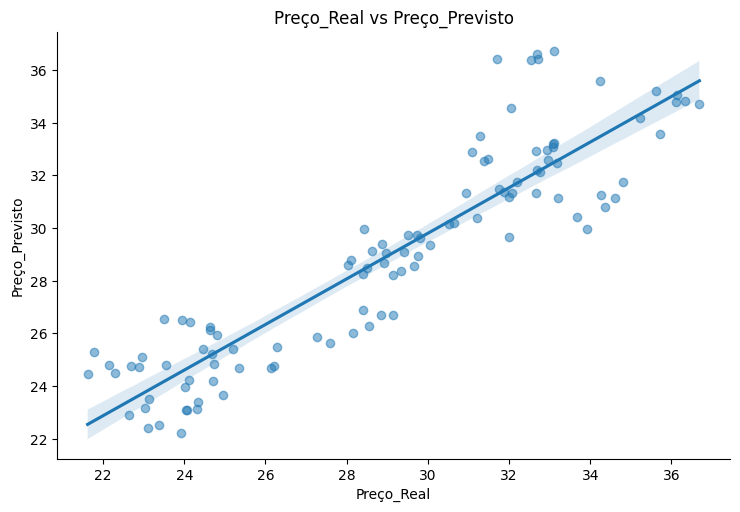

In [26]:
# Plota gr√°fico de dispers√£o com linha de regress√£o (fit_reg)
sns.lmplot(x='Pre√ßo_Real', y='Pre√ßo_Previsto', data=compare_df, aspect=1.5, fit_reg=True, scatter_kws={'alpha':0.5})

# Define os r√≥tulos dos eixos e t√≠tulo
plt.xlabel("Pre√ßo_Real")
plt.ylabel("Pre√ßo_Previsto")
plt.title("Pre√ßo_Real vs Pre√ßo_Previsto")
plt.show()

Os pontos visivelmente se atraem pr√≥ximos √† linha de regress√£o indicando que as previs√µes do modelo s√£o, na maior parte do tempo, consistentes com os valores reais.

Foi criado ent√£o um gr√°fico que comparou visualmente os pre√ßos reais (em vermelho) e os pre√ßos previstos (em azul) ao longo do tempo. Para aumentar a clareza da observa√ß√£o, foi adicionado um atraso (*lag*) no pre√ßo real de n dias de acordo com a vari√°vel `days_before`, essa sobreposi√ß√£o das linhas permite a an√°lise direta da precis√£o do modelo em rela√ß√£o aos dados reais.

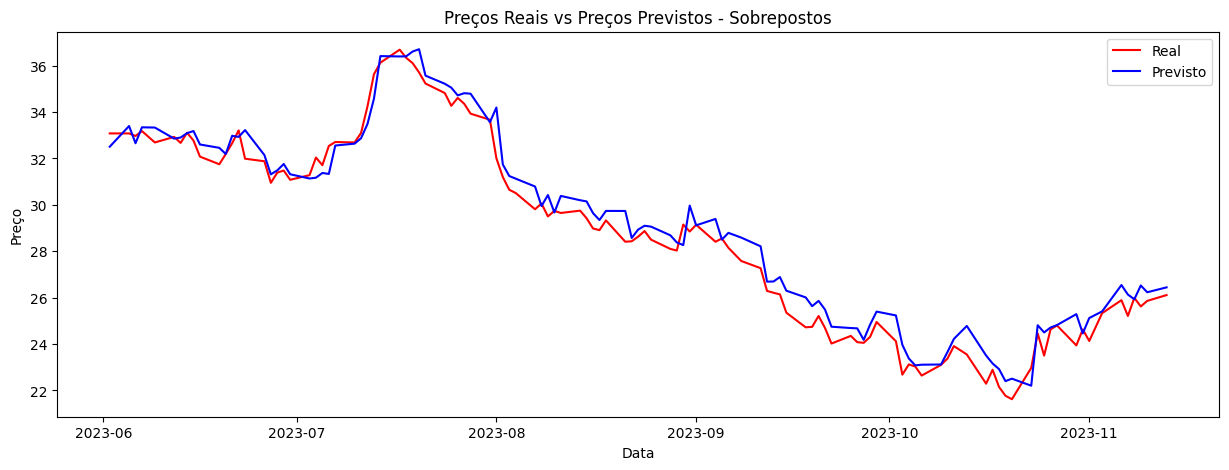

In [27]:
# Cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(15,5))

# Plota os valores reais e previstos
ax.plot_date(compare_df.index, compare_df.Pre√ßo_Real.shift(-days_before), 'r-', label='Real')
ax.plot_date(compare_df.index, compare_df.Pre√ßo_Previsto, 'b-', label='Previsto')

# Define os r√≥tulos, t√≠tulo e legenda
ax.set_xlabel('Data')
ax.set_ylabel('Pre√ßo')
ax.set_title('Pre√ßos Reais vs Pre√ßos Previstos - Sobrepostos')
ax.legend()

plt.show()

No gr√°fico apresentado, observa-se que o modelo consegue estimar com precis√£o os valores reais. √â importante destacar que tanto os valores m√°ximos quanto os m√≠nimos n√£o ultrapassam os valores reais, garantindo assim a seguran√ßa do investidor. Vale ressaltar que, apesar do gr√°fico estar sobreposto, os valores previstos foram calculados com n dias de anteced√™ncia, conforme estabelecido durante a prepara√ß√£o dos dados.

Para finalizar nossa visualiza√ß√£o, foi plotado um gr√°fico com ambas as linhas de acordo com suas datas reais, note que os valores previstos indicam com precis√£o quais √†s tend√™ncias que sucederam no decorrer dos dias. Por exemplo: Note que durante a alta nos valores a partir da metade do m√™s 2023-07, a previs√£o j√° indicava uma poss√≠vel corre√ß√£o ou revers√£o, sendo confirmado com os valores reais se desvalorizando pouco antes do in√≠cio de 2023-08.

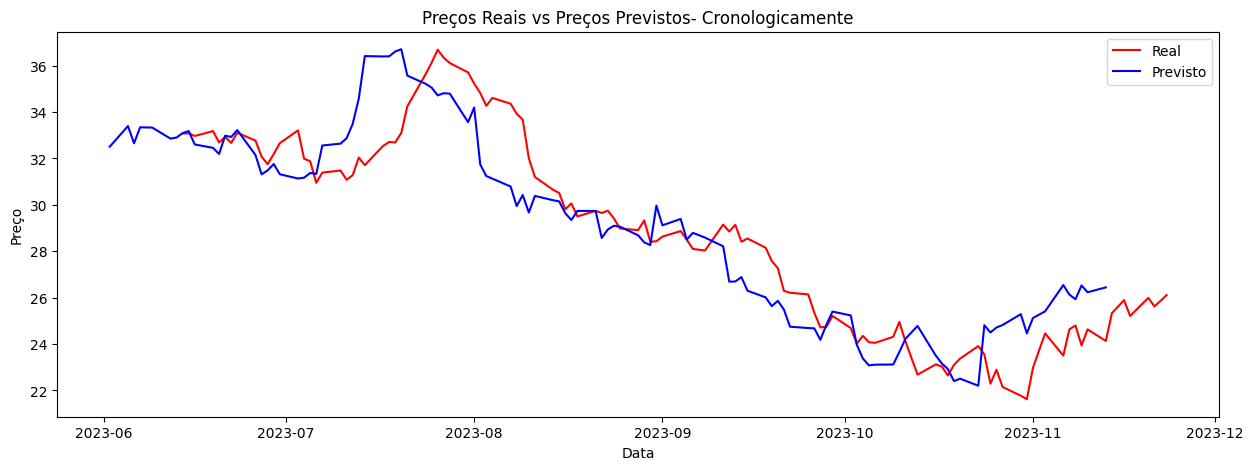

In [28]:
# Cria uma figura e um conjunto de subplots
fig, ax = plt.subplots(figsize=(15,5))

# Plota os dados reais
ax.plot_date(compare_df.index, compare_df.Pre√ßo_Real, 'r-', label='Real')

# Plota os dados previstos
ax.plot_date(compare_df.index, compare_df.Pre√ßo_Previsto, 'b-', label='Previsto')

# Define os r√≥tulos, t√≠tulo e legenda
ax.set_xlabel('Data')
ax.set_ylabel('Pre√ßo')
ax.set_title('Pre√ßos Reais vs Pre√ßos Previstos- Cronologicamente')
ax.legend()

plt.show()

<a id='conclusion'></a>
## Conclus√£o

Neste projeto, realizou-se a obten√ß√£o de dados financeiros do setor de sa√∫de por meio de da API *yFinance*, seguida pela an√°lise e verifica√ß√£o da correla√ß√£o entre as vari√°veis extra√≠das. Foram desenvolvidas duas classes organizadas, a `DataPreparation` para prepara√ß√£o dos dados, convertendo o dataframe original em um formato adequado para an√°lise e modelagem, selecionando features, aplicando opera√ß√µes desejadas e criando colunas com valores de dias anteriores e a segunda classe, `ModelTraining`, criada para treinar e predizer dados, utilizando o m√©todo `train_and_predict()`. 
Foram empregadas m√©tricas como Erro M√©dio Absoluto (MAE), Erro Quadr√°tico M√©dio (MSE) e Valida√ß√£o Cruzada (CV) para avaliar o desempenho do modelo, e os resultados foram armazenados no dataframe `metrics_df`. A an√°lise desses resultados indicou um desempenho satisfat√≥rio do modelo, com consist√™ncia em diferentes subconjuntos de dados. Gr√°ficos foram gerados para visualizar a precis√£o das previs√µes ao longo do tempo, identificando tend√™ncias e padr√µes nos dados. Em resumo, o projeto abrangeu extra√ß√£o, prepara√ß√£o, treinamento e avalia√ß√£o de um modelo de regress√£o linear, cujas previs√µes foram consideradas relativamente satisfat√≥rias e consistentes.

### Recomenda√ß√µes

Este notebook tem como objetivo fornecer uma an√°lise did√°tica de dados financeiros e n√£o deve ser interpretado como uma recomenda√ß√£o de investimento, as conclus√µes e resultados apresentados s√£o apenas para fins educativos. Os m√©todos apresentados aqui s√£o simplistas, para uma predi√ß√£o robusta √© preciso levar em considera√ß√£o outros fatores e aplicar m√©todos diferentes como:

#### An√°lise T√©cnica
A an√°lise t√©cnica no mercado de a√ß√µes utiliza gr√°ficos, padr√µes e indicadores para prever movimentos futuros com base em dados hist√≥ricos de pre√ßos e volumes. Ela se concentra em identificar tend√™ncias, suportes e resist√™ncias, al√©m de usar indicadores matem√°ticos para orientar decis√µes de compra ou venda. O conceito pode ser facilmente incorporado neste projeto por se fazer uso de m√©dias m√≥veis, fibonacci, IFR entre outros. 

*fonte: https://www.thestreet.com/investing/technical-analysis-14920339*

#### An√°lise Fundamentalista
A an√°lise fundamentalista √© um m√©todo de avalia√ß√£o de ativos que se concentra na situa√ß√£o financeira, econ√¥mica e setorial de uma empresa. Ela busca determinar o valor intr√≠nseco de uma a√ß√£o, levando em considera√ß√£o fatores como patrim√¥nio, lucro e receita da empresa. 

*fonte: https://www.thestreet.com/investing/technical-analysis-14920339*

#### An√°lise de Sentimento
A An√°lise de Sentimento utiliza processamento de linguagem natural avan√ßado para determinar se os dados textuais fornecidos s√£o positivos, negativos ou neutros. Esse tipo de an√°lise pode ser aplicado a grandes conjuntos de dados textuais, como avalia√ß√µes de clientes, teses de pesquisa, papers cient√≠ficos, etc. Em um contexto espec√≠fico, pode ser utilizado para analisar contas de redes sociais, como o Twitter, ou avalia√ß√µes no Facebook de uma empresa. Pode tamb√©m ser implementada em um projeto paralelo que alimente este modelo de predi√ß√£o com as informa√ß√µes extra√≠das. 

*fonte: https://repositorium.sdum.uminho.pt/bitstream/1822/73511/2/2021_Melhado_Rabot_Analise-de-sentimentos.pdf*

---



üëâ Este projeto foi desenvolvido por *[Fernando Carneiro](https://www.linkedin.com/in/fernandohcarneiro/)*, conecte-se comigo!  <a href="https://www.linkedin.com/in/fernandohcarneiro/" target="_blank"><a title="LinkedIn, Public domain, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:LinkedIn_logo_initials.png"><img width="24" alt="LinkedIn logo initials" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/LinkedIn_logo_initials.png/64px-LinkedIn_logo_initials.png"></a> 
